<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [152]:
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
#import scipy.stats 
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

In [135]:
#### Add your code below following the instructions given in the course to complete the peer graded assignment

# 2.a For the "Median value of owner-occupied homes" provide a boxplot

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


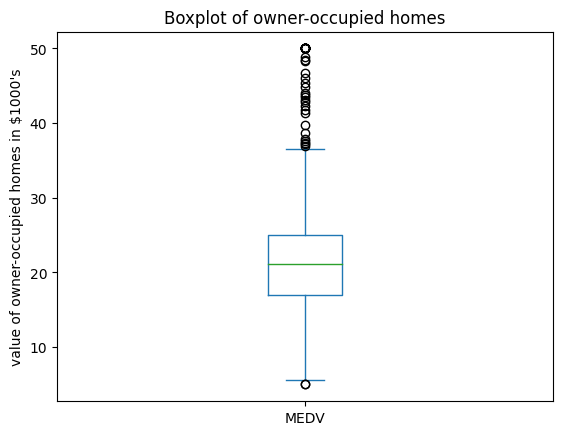

In [127]:
boston_df["MEDV"].plot(kind="box")
plt.ylabel("value of owner-occupied homes in $1000's")
plt.title("Boxplot of owner-occupied homes")
plt.show()

Text(0.5, 1.0, 'boxplot of owner-occupied homes')

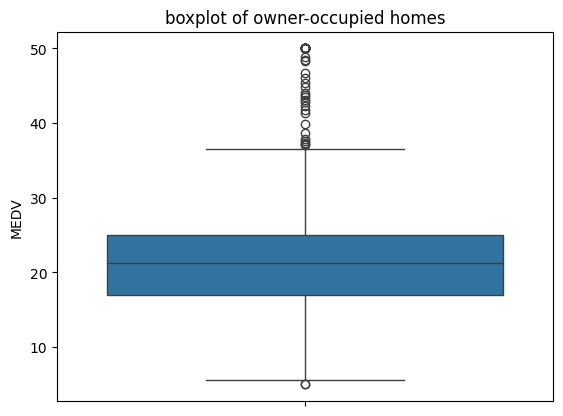

In [126]:
sns.boxplot(data=boston_df , y='MEDV')
plt.title("Boxplot of owner-occupied homes")

# 2.b Provide a  bar plot for the Charles river variable

In [119]:
df_river=boston_df.groupby(["CHAS"]).sum()
df_river = df_river.drop(columns=["Unnamed: 0"])  # Drop the column
df_river

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CHAS,,,,,,,,,,,,
0.0,1763.63446,5480.0,5190.04,259.9058,2951.839,31986.4,1814.2518,4506.0,193049.0,8726.3,6008.99,10406.2
1.0,64.80846,270.0,445.17,20.7699,228.186,2712.5,106.0398,326.0,13519.0,612.2,393.46,995.4


Text(0.5, 1.0, 'Bar plot for the Charles river variable')

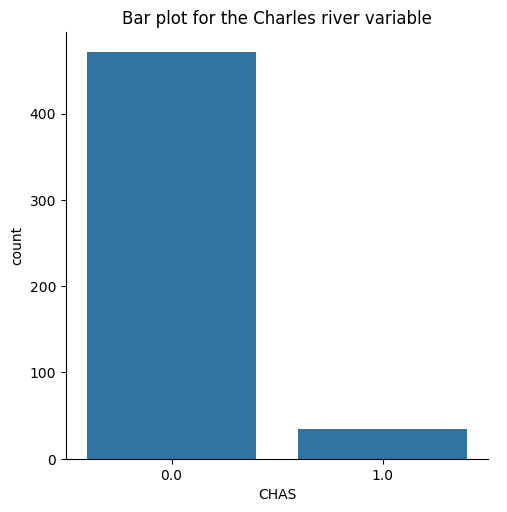

In [128]:
sns.catplot(kind="count" , x="CHAS" , data=boston_df)
plt.title("Bar plot for the Charles river variable")

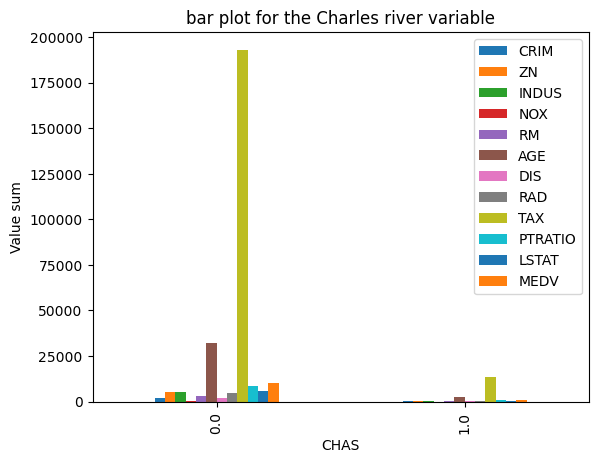

In [124]:
# Additional barplot not necessary 
df_river.plot(kind="bar")
plt.ylabel("Value sum")
plt.title("Bar plot for the Charles river variable")
plt.show()

# 2.c Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs AGE')

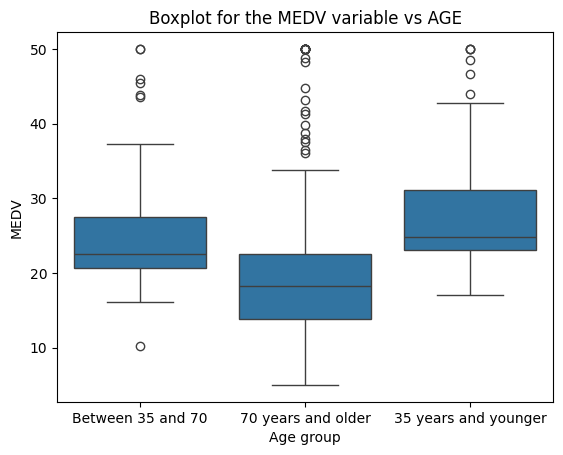

In [134]:
boston_df.loc[(boston_df["AGE"] <=35) ,'Age group' ]="35 years and younger"
boston_df.loc[(boston_df["AGE"] >35) & (boston_df["AGE"]<70) ,'Age group' ]="Between 35 and 70"
boston_df.loc[(boston_df["AGE"] >= 70) ,'Age group' ]="70 years and older"
sns.boxplot(data=boston_df , y='MEDV' , x='Age group')
plt.title("Boxplot for the MEDV variable vs AGE")

# 2.d Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'relationship between NNOX and INDUS')

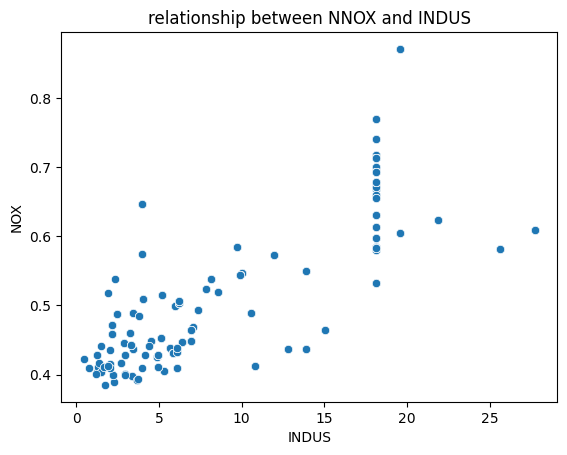

In [137]:
sns.scatterplot(data=boston_df , x='INDUS' , y='NOX')
plt.title("relationship between NNOX and INDUS")

In [ ]:
print("There is a significant and positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

# 2.e Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'PTRATIO')

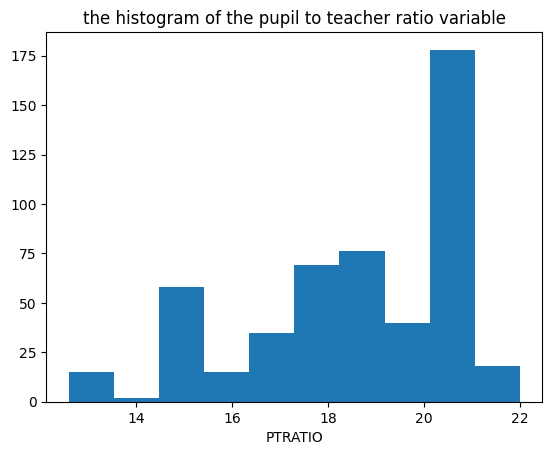

In [139]:
plt.hist(x="PTRATIO" , data=boston_df )
plt.title("the histogram of the pupil to teacher ratio variable")
plt.xlabel("PTRATIO")

# 3. Hypothesis Test
### State your hypothesis.

### Use α = 0.05
### Perform the test Statistics.
### State the conclusion from the test.

# 3.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [157]:
#H0: there is no diferences
#H1: there is differences

df_chas1=boston_df[boston_df['CHAS']==0]["MEDV"]
df_chas2=boston_df[boston_df['CHAS']==1]["MEDV"]

# Perform the t-test:
t_stat, p_value = stats.ttest_ind(df_chas1, df_chas2)

print(f"F-Statistic:{t_stat}")
print(f"P-Value:{p_value}")

# Interpret the results:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis; there is not a significant difference in median value of houses bounded by the Charles river.")

F-Statistic:-3.996437466090509
P-Value:7.390623170519905e-05
Reject the null hypothesis; there is a significant difference in median value of houses bounded by the Charles river.


# 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [160]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_cat,Age group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70,Between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70,Between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70,Between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70,Between 35 and 70


In [162]:
#H0: there is no diferences
#H1: there is differences

age1=boston_df[boston_df['Age_cat']=="35 years and younger"]['MEDV']
age2=boston_df[boston_df['Age_cat']=="between 35 and 70"]['MEDV']
age3=boston_df[boston_df['Age_cat']=="70 years and older"]['MEDV']

f_Statistic , p_value=stats.f_oneway(age1 , age2 , age3)

print(f"F-Statistic:{f_Statistic}")
print(f"P-Value:{p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Medians are significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not significantly differences between median values.")


F-Statistic:36.40764999196599
P-Value:1.7105011022702984e-15
Reject null hypothesis: Means are significantly different.


# 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [163]:
#H0: there is no relationship
#H1: there is relationwhip

x=boston_df["INDUS"]
y=boston_df["NOX"]
correlation_coefficient, p_value = stats.pearsonr(x, y)
print(f"F-Statistic:{correlation_coefficient}")
print(f"P-Value:{p_value}")

if p_value < 0.05:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")

F-Statistic:0.7636514469209192
P-Value:7.913361061210442e-98
Reject null hypothesis: Means are significantly different.


# 3.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [177]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

print(f"The impact is an additional distance of: {model.params.iloc[1]}")

The impact is an additional distance of: 1.091613015841107
